# Store Data Analysis 
*-Submitted by: Rupali Jain*

*Email: rupalisumatijain@gmail.com*

## Store based Performance

Import necessary libraries for function call and visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read complete sales data of all the stores from excel
data=pd.read_excel('product data.xlsx')

General exploration of data

In [3]:
data

,Sno.,Catcode,Barcode,Item Name,Sales Qty,Sales Value,Sales Ret Qty,Sales Ret Value,Net Qty,Net Value
0,1,R8APRS,R8APRS18,PREMIUM PRIMEX-9-101(SAREE),1.0,1299,0,0,1,1299
1,2,R8LIR,R8LIR2,LIORA-D-102-(SAREE),1.0,699,0,0,1,699
2,3,RSCN,R8BFS3,BLUSH FLORA LS-A-103-(SAREE),1.0,699,0,0,1,699
3,4,RSCN,R8BTY3,BETSY-103-(SAREE),1.0,899,0,0,1,899
4,5,RSCN,R8HZL1,HAZEL-101-(SAREE),1.0,999,0,0,1,999
...,...,...,...,...,...,...,...,...,...,...
18157,500,CBCB,$$CBLY587,CB103-CHIKKU(XL/XXL),1.0,449,0,0,1,449
18158,501,CBCB,$$CBLY591,CB135-BLACK(M/L),1.0,449,0,0,1,449
18159,502,CBCB,$$CBLY637,CB101-WHITE (XL/XXL),1.0,449,0,0,1,449
18160,503,CBCB,$$CBLY639,CB135-BLACK (XL/XXL),2.0,898,0,0,2,898


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 10 columns):
Sno.               18162 non-null object
Catcode            18108 non-null object
Barcode            18108 non-null object
Item Name          18108 non-null object
Sales Qty          18108 non-null float64
Sales Value        18162 non-null int64
Sales Ret Qty      18162 non-null object
Sales Ret Value    18162 non-null object
Net Qty            18162 non-null object
Net Value          18162 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [5]:
data.columns

Index(['Sno.', 'Catcode', 'Barcode', 'Item Name', 'Sales Qty', 'Sales Value',
       'Sales Ret Qty', 'Sales Ret Value', 'Net Qty', 'Net Value'],
      dtype='object')

### Product Based Analysis

Column 'Item Name' consists of various factors along with product type. We need to filter out unnecessary product types and only select Saree, Kurti and Suit for product based analysis.

In [6]:
data['Item Name']

0         PREMIUM PRIMEX-9-101(SAREE)
1                 LIORA-D-102-(SAREE)
2        BLUSH FLORA LS-A-103-(SAREE)
3                   BETSY-103-(SAREE)
4                   HAZEL-101-(SAREE)
                     ...             
18157            CB103-CHIKKU(XL/XXL)
18158                CB135-BLACK(M/L)
18159            CB101-WHITE (XL/XXL)
18160            CB135-BLACK (XL/XXL)
18161            CL BOTTOM-125(GREEN)
Name: Item Name, Length: 18162, dtype: object

We will create a custom function to find out if Item Name(temp product) has 'Kurti', 'Saree' or 'Suit' in their description and filter out other product details/names. If the  condition is satisfied, it will return respective value(Kurti, Saree or Suit).
If either of these 3 is not found in Item Name(tempproduct), it will return null value.

In [7]:
#function will find out if an Item Name contains 'Kurti','Saree', or 'Suit'. 
def findproduct(itemname):
    if 'KURTI' in itemname:
        return 'Kurti'
    elif 'SAREE' in itemname:
        return 'Saree'
    elif 'SUIT' in itemname:
        return 'Suit'
    else: return 

In [8]:
#to aplly function findproduct() to each value in column Item Name(tempproduct)
data['Product']=data['Item Name'].apply(lambda x:findproduct(str(x)))

#data[Product] is the column which consists only the category of product
# wiz. Kurti, saree and Suit
data['Product'].value_counts()

Kurti    8610
Suit     3645
Saree    2131
Name: Product, dtype: int64

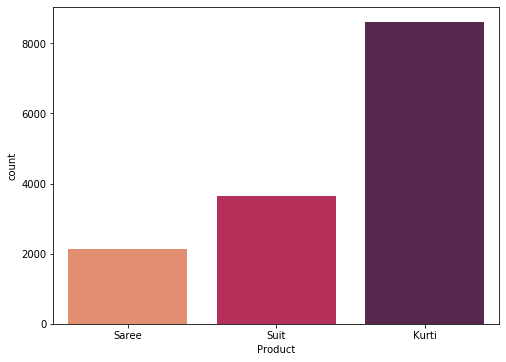

In [9]:
sns.countplot(x='Product', data=data,palette='rocket_r')
plt.tight_layout(-3)

Analysis statement: From above data outputs in line [8] and [9], wiz. each product count and plot graph, we understand that Kurti's are the most sold item, which means we have wide customers who prefer to buy Kurti over saree and Suit. Thus we need to increase stocks and variety of Kurti to increase our sales.

### MRP Based Analysis

Now, MRP = Net Value/Net Qty;

We need to make sure that any value in Net Qty should not be equal to 0. If it is equal to 0, the division command will give an error 'Zero division error' on execution (any number divied by 0 is not defined mathematically) and no potput will be generated.

Since we need to make modifications, and remove 0 values in 'Net Qty', we will first create a new dataframe called 'mrpdata' with data columns namely 'netvalue' and 'netquantity' from columns in 'data', 'Net Value' and 'Net Qty' respectively (so our basic data frame does not get altered for further analysis). 

In [10]:
mrpdata=pd.DataFrame()

In [11]:
mrpdata['netvalue']=data['Net Value']
mrpdata['netquantity']=data['Net Qty']

In [12]:
mrpdata

,netvalue,netquantity
0,1299,1
1,699,1
2,699,1
3,899,1
4,999,1
...,...,...
18157,449,1
18158,449,1
18159,449,1
18160,898,2


In [13]:
#to find out if any value in netquantity=0
mrpdata[mrpdata['netquantity']==0]

,netvalue,netquantity
113,0,0
121,0,0
302,0,0
324,0,0
337,0,0
...,...,...
17677,0,0
17838,0,0
17860,0,0
17893,0,0


From above output we see that there are total of 365 rows with values which are 0, we need to get rid of them so that we do not encounter any errors while division and finding out MRP of each product. 

Note: Removing any product with value equals 0 for Net Value and Net Qty will not affect our analysis, because the customer any way ended up returning the product and this does not add up to out store's sales.

In [14]:
#to remove all rows with 0 value
mrpdata=mrpdata[mrpdata['netquantity']!=0]
mrpdata

,netvalue,netquantity
0,1299,1
1,699,1
2,699,1
3,899,1
4,999,1
...,...,...
18157,449,1
18158,449,1
18159,449,1
18160,898,2


In [15]:
#function to divide make division find MRP = Net Value/Net Qty
def divisionfunc(a,b):
    return a/b

#statement that will execute the above function divisionfunc to each row in the 'mrpdata'
mrpdata['MRP']=mrpdata.apply(lambda x:divisionfunc(x['netvalue'],x['netquantity']),axis=1)

TypeError: ("unsupported operand type(s) for /: 'str' and 'str'", 'occurred at index 7203')

In [16]:
mrpdata.loc[7203]

netvalue        0
netquantity     0
Name: 7203, dtype: object

The error in line [15] is an unusual error because all values in these two columns are integer, also when checked the values at index 7203 (as mentioned in error statement), we see that the values are still 0, although we got rid of all 0 values. This requires correction, to proceed further. Thus we will remove the row with index 7203 for further analysis

In [17]:
mrpdata.drop(index=7203,axis=0,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
#To check if the row index 7203 has been removed successfully
mrpdata.loc[7203]

KeyError: 7203

In [19]:
#reexecution of line [15] since we received an error earlier
mrpdata['MRP']=mrpdata.apply(lambda x:divisionfunc(x['netvalue'],x['netquantity']),axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


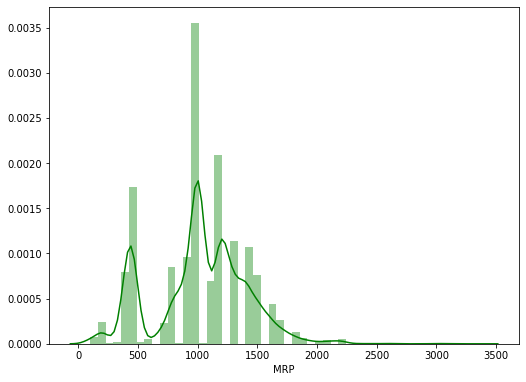

In [20]:
sns.distplot(mrpdata['MRP'],kde=True,color='green')
plt.tight_layout(-4)

Analysis statement: From above graphical representation we see that most products sold from our store range from Rs. 900 to 1000. Thus we need to increase more products in this price category, in order to increase our sales.

### Category based Analysis

In [21]:
#This will give all the unique catcodes
data['Catcode'].unique()

array(['R8APRS', 'R8LIR', 'RSCN', 'RSCE', 'RSEN', 'RSEW', 'RSEE', 'RSEH',
       'RCCN', 'RCCE', 'RCEN', 'RCEE', 'RCEH', 'RKCP', 'RKCN', 'RKCW',
       'RKCE', 'RKEE', 'RKEH', 'CKCE', 'RSTL', 'RDPT', 'RMSK', 'RBAL',
       'CCEE', 'CBAL', 'CBFL', 'CBCB', nan, '$THDPT', '$TNC', '$HMG',
       'RSCP', 'RSCW', 'RSSW', 'RCCP', 'RKEN', 'CBPP', '$$ELPZ', 'CBFU',
       'R816MKRS', 'RKCH', 'RBFL', 'RBPZ', '$VSS', 'RCEP', '$$PAL',
       '$CAL', '$$ELS', '$$SAF', '$$EML', '$BTM', 'CBLB', 'R8FKC', 'RKEP',
       'RSSE', '$$THU', '$$TAL', '$$SITH', '$SFT', 'R87APRS', '$$TIA',
       '$$THN', '$$ZSA', '$$SBT'], dtype=object)

In [22]:
#this will give the total number of unique catcodes
data['Catcode'].nunique()

64

As it is, there are 3 Major Categories Such As Casual, Ethinic And Signature. Also that RKCE stands for Retail Kurti Casual Embroidery. 

Note: Full form of all abbreviations is not given, hence making assumptions, as mentioned below.

Assumption:
1. If catcode starts with character '$', it belongs to Signature collection
2. If catcode's second last character is 'E' (standing for ethnic) is belongs to Ethnic collection
3. If catcode's second last character is 'C' (standing for casual), it belongs to Casual collection
4. And if none of the above conditions are satisfied, it again belongs to the Signature collection

In [23]:
#this is a custom function which will check catcode belongs to which category 
#based off of our assumption
def findcategory(x):
    if x[0]=='$':
        return 'Signature'
    elif x[-2].upper()=='E':
        return 'Ethnic'
    elif x[-2].upper()=='C':
        return 'Casual'
    else: return 'Signature'

#this command will execute the function findcategory() to every row in Catcode
data['Category']=data['Catcode'].apply(lambda x:findcategory(str(x)))

In [24]:
data['Category'].value_counts()

Casual       8549
Ethnic       6274
Signature    3339
Name: Category, dtype: int64

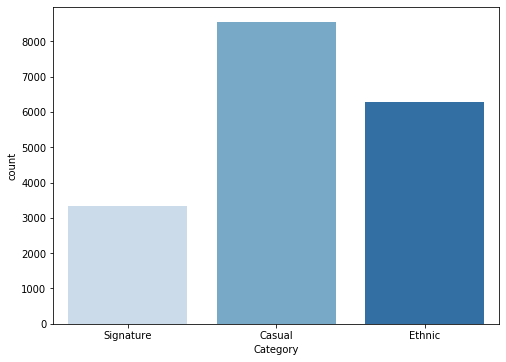

In [25]:
sns.countplot(x='Category',data=data,palette='Blues')
plt.tight_layout(-3)

Analysis statement: From above output in line [24] and [25], we can conclude that maximum of our castumer base prefers to buy clothes from Casual collection/category, then Ethnic and lastly Signature. Thus in order to increase our sales and please our customers, we need to increase the Casual wear collection.

### Size based Analysis - *Kurti*

It is given that for Kurti, the size can be found out using the column Item name, as its vaues are in a pattern of Product type, followed by Product size, followed by Kurti in round brackets. 

So we will first split and pick product size from Item Name.

In [26]:
#this will create a new dataframe called ksdata with only the products that are Kurti's
#we created a column 'Product' earlier, which distinguishes Kurti's from other products

ksdata=data[data['Product']=='Kurti']

In [27]:
#this will pick check each of Item Names which are Kurti, and pick out sizes from them

ksdata['Size']=ksdata['Item Name'].apply(lambda x:x.split()[-1].split('-')[-1].split('KURTI')[0].split('(')[0].split(')')[0])
ksdata['Size']=ksdata['Size'].apply(lambda x:x.replace('3XL','XXXL'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
ksdata['Size'].value_counts()

L       1615
XL      1577
M       1543
        1388
XXL      925
S        848
XS       667
XXXL      46
102        1
Name: Size, dtype: int64

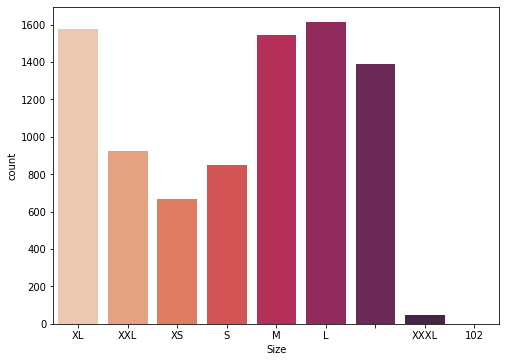

In [29]:
sns.countplot(x='Size',data=ksdata,palette='rocket_r')
plt.tight_layout(-3)

Analysis Statement: From above graph we can infer that the most sold Kurtis are in Size XL, M, and L. Thus these kurti sizes need to be restocked on a frequent basis.

For a more closer look, refer to the output in line [28], which gives exact count of each of these 3 preferred sizes. Which signifies that L, XL, M is the decreasing most wanted sizes.

### Bottomwear Analysis

Going through the database I deduce that there are 3 major categories in bottomwear:
1. Leggings, which is further divided into Ankle Length and Full Length (mentioned as LEGGINGS in Item name)
2. Pencil Pants (mentioned as PENCIL PANT in Item Name)
3. Chudi Bottom (mentioned as CB in Item Name)

We will filter these categories from Item Names, for analysis of their demand in customers.

In [30]:
#custom function which checkes if a an Item is Bottomwear, and its category
def bottomwear(x):
    if 'LEGGINGS' in x:
        if 'AL' in x.split()[0]:
            return 'Ankle length Leggings'
        else: return 'Full length Leggings'
    elif 'PENCIL PANT' in x:
        return 'Pencil Pants'
    elif 'CB' in x:
        return 'Chudi Bottom'
    else: return 

#to execute the above function bottomwear() on every item in column 'Item Name' in data
data['Bottomwear category']=data['Item Name'].apply(lambda x:bottomwear(str(x)))

In [31]:
data['Bottomwear category'].value_counts()

Full length Leggings     1436
Ankle length Leggings     665
Chudi Bottom              486
Pencil Pants              156
Name: Bottomwear category, dtype: int64

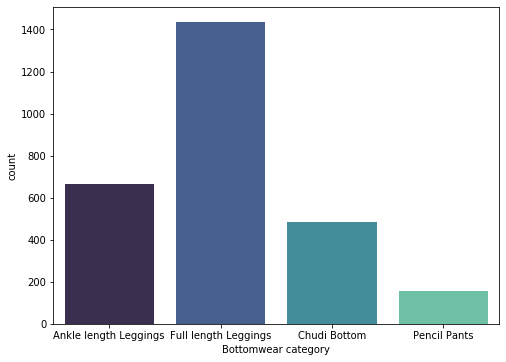

In [32]:
sns.countplot(x='Bottomwear category', data=data, palette='mako')
plt.tight_layout(-3)

Analysis statement: Above graph represents that the most sold item are Leggings when comes to Bottomwear. Also that among the 2 categories in Leggings, Full length leggings are more preffered by customers over Ankle length leggings.

### Size based Analysis - *Bottomwear*

We have a column with name 'Bottomwear category' which tells us if an item is Ankle length leggings, Full length leggings, Pencil pant or Chudi bottom, and a null value otherwise. 

So we will create a new data frame called 'bwdata' which will which will only comprise of items that are bottomwear and not otherwise

In [33]:
#create new data frame with bottomwears only

bwdata=pd.DataFrame()
bwdata['itemname']=data['Item Name']
bwdata['bottomwear']=data['Bottomwear category']
bwdata.dropna(inplace=True)

In [34]:
#to select sizes from each of bottomwear's itemname

bwdata['Size']=bwdata['itemname'].apply(lambda x:str(x).split('(')[-1].split(')')[0].split()[-1])
bwdata['Size']=bwdata['Size'].apply(lambda x:x.replace('ML','M/L'))

In [35]:
bwdata['Size'].value_counts()

XL/XXL     1383
M/L        1276
XL/XX        28
M            10
FULL          8
L             7
XS            7
XL            5
BLUE          5
RANI          5
YELLOW        3
GREEN         2
XXL           2
MAGENTA       1
S             1
Name: Size, dtype: int64

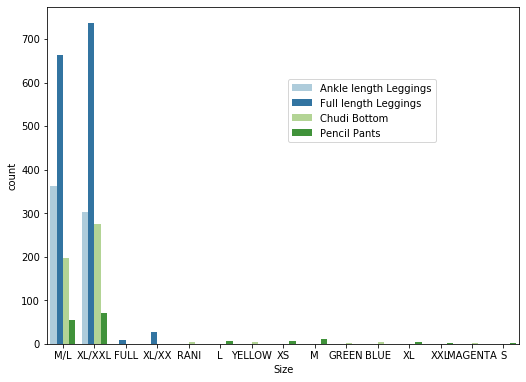

In [36]:
sns.countplot(x='Size', data=bwdata,hue='bottomwear',palette='Paired')
plt.tight_layout(-4)
plt.legend(bbox_to_anchor=(0.5,0.8),loc=2)

Analysis statement: Above graph shows the sizes bought by customers, which is further divided divided into category of bottomwear. Taking a look at overall sizes, we can say that M/L and  XL/XXL have a fair competition to be the winner in most preferred/sold item by customers, and that XL/XXL wins the battle (some of the values in graph is garbage). However if we look closely, we can deduce that,
1. For Ankle length leggings, customers prefer M/L size over XL/XXL
2. For Full length leggings, Pencilpants and Chudi bottoms, customers prefer XL/XXL over size M/L

### Sales return Analysis

All items that are retuend have a non zero value in column 'Sales Ret Qty', which can be used to filter out the products which are retuned and which aren't.

In [37]:
#custom function to find value in 'Sales Ret Qty' and dividing the products into sections
def isreturned(x):
    if x==0:
        return 'Not returned Item'
    else: return 'Returned Item'

#to execute above function in each of the rows indexes in column 'Sales Ret Qty'
data['return/not']=data['Sales Ret Qty'].apply(lambda x:isreturned(x))

In [38]:
data['return/not'].value_counts()

Not returned Item    17363
Returned Item          799
Name: return/not, dtype: int64

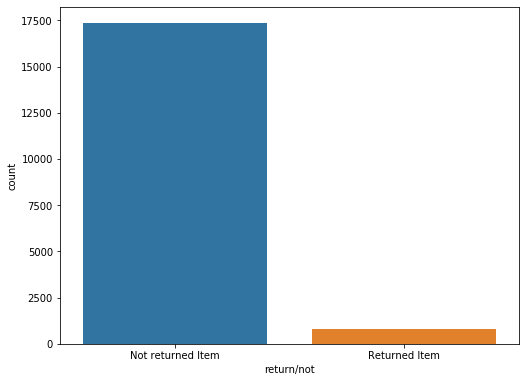

In [39]:
sns.countplot(x='return/not',data=data)
plt.tight_layout(-4)

Analysis Statement: The above graph shows the ratio of Not returned items to Returned items. And line [38], gives the exact count of items returned vs. not returned, which can help make better decisions.

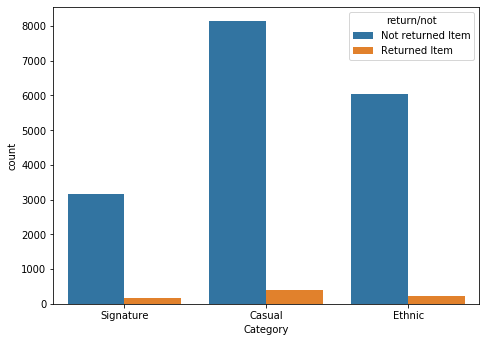

In [40]:
sns.countplot(x='Category', data=data, hue='return/not')
plt.tight_layout(-2)

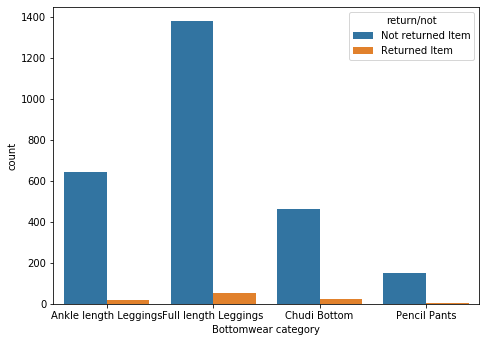

In [41]:
sns.countplot(x='Bottomwear category', data=data, hue='return/not')
plt.tight_layout(-2)

Analysis Statemnt: The above 2 graphs in line [40] and [41], show the return ratio of each of upperwear categories, and bottomwear categories as well. Which will again help in making appropriate decisions.

The End